In [1]:
# User-defined Parameters (Edit these)
data_train_path = "C:/Users/om/Desktop/Image_Classification_1/Fruits_Vegetables/train"
data_val_path = "C:/Users/om/Desktop/Image_Classification_1/Fruits_Vegetables/validation"
data_test_path = "C:/Users/om/Desktop/Image_Classification_1/Fruits_Vegetables/test"

img_width = 180
img_height = 180
batch_size = 32
epochs_size = 25

prediction_image_path = "Apple.jpg"
model_save_path = "Image_classify.keras"


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models


In [3]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    image_size=(img_height, img_width),
    shuffle=False,
    batch_size=batch_size
)

data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size=(img_height, img_width),
    shuffle=False,
    batch_size=batch_size
)

data_cat = data_train.class_names
print("Class names:", data_cat)


Found 3115 files belonging to 36 classes.
Found 351 files belonging to 36 classes.
Found 359 files belonging to 36 classes.
Class names: ['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


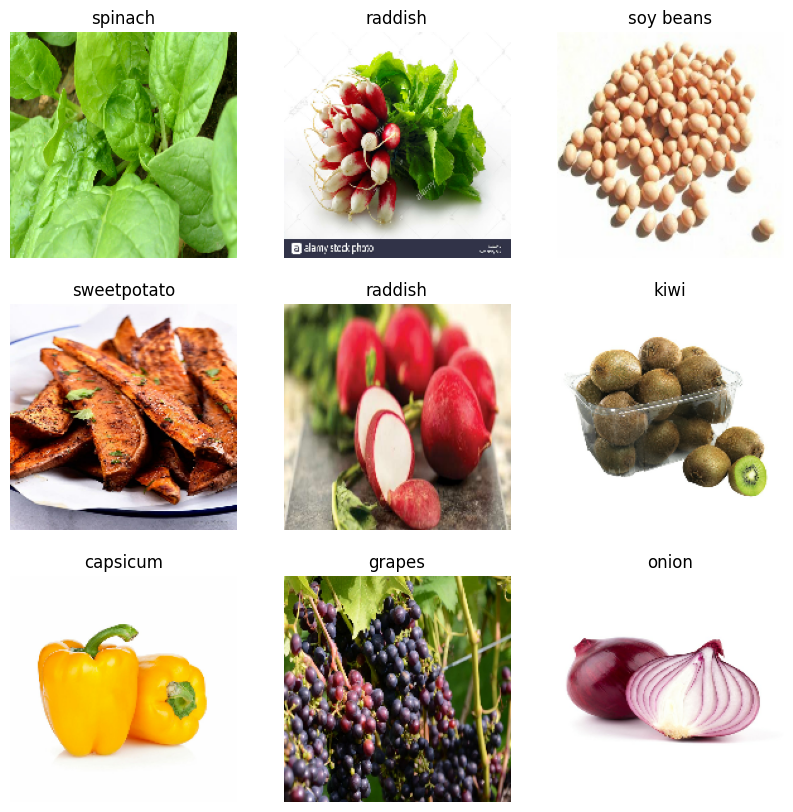

In [4]:
plt.figure(figsize=(10, 10))
for images, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(data_cat[labels[i]])
        plt.axis("off")
plt.show()


In [5]:
model = models.Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(data_cat))  # Output layer
])


In [6]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


In [7]:
history = model.fit(
    data_train,
    validation_data=data_val,
    epochs=epochs_size
)


Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 80s 774ms/step - accuracy: 0.0314 - loss: 3.9090 - val_accuracy: 0.0570 - val_loss: 3.4073
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 66s 676ms/step - accuracy: 0.0903 - loss: 3.2971 - val_accuracy: 0.2963 - val_loss: 2.4759
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 66s 664ms/step - accuracy: 0.2740 - loss: 2.5425 - val_accuracy: 0.5356 - val_loss: 1.5874
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 66s 670ms/step - accuracy: 0.4235 - loss: 1.9365 - val_accuracy: 0.7721 - val_loss: 0.8343
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 66s 671ms/step - accuracy: 0.6217 - loss: 1.2713 - val_accuracy: 0.8917 - val_loss: 0.4942
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 67s 677ms/step - accuracy: 0.7808 - loss: 0.7135 - val_accuracy: 0.9088 - val_loss: 0.4391
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 80s 646ms/step - accuracy: 0.8750 - loss: 0.4559 - val_accuracy: 0.9316 - val_loss: 0.3368
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 69s 700ms/step - accuracy: 0.9388 - loss: 0.2541 - val_accu

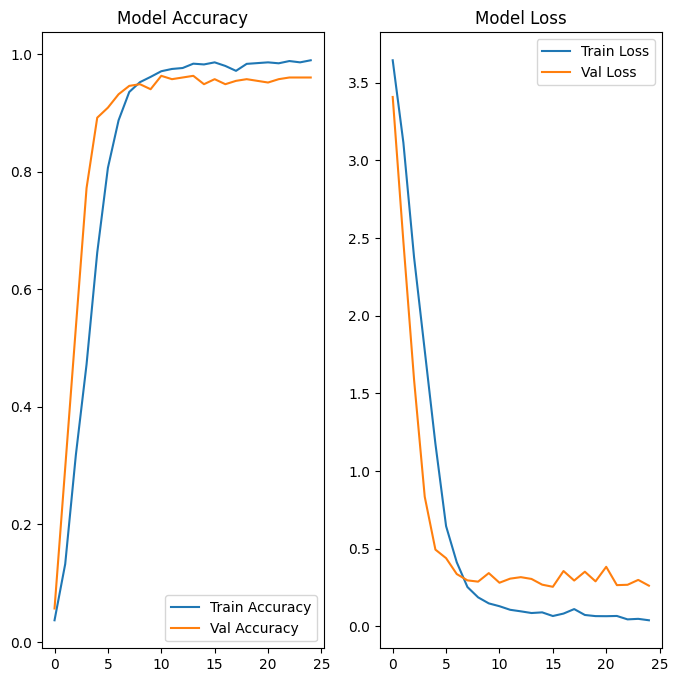

In [8]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8, 8))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Train Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Train Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.legend()

plt.show()


In [10]:
image = tf.keras.utils.load_img(prediction_image_path, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(image)
img_batch = tf.expand_dims(img_array, 0)  # Convert to batch

predictions = model.predict(img_batch)
score = tf.nn.softmax(predictions[0])

print("Predicted category:", data_cat[np.argmax(score)])
print("Confidence: {:.2f}%".format(100 * np.max(score)))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
Predicted category: apple
Confidence: 99.61%


In [11]:
model.save(model_save_path)
print(f"✅ Model saved at: {model_save_path}")


✅ Model saved at: Image_classify.keras
